**WARNING:**
Since this is under development and not yet published, run this script at the root directory (*so there will be no import error*) for testing purposes. This will be patched in a future commit once a toml config file is setup, and this script will be moved to the examples directory.

### Example using Iris Dataset

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from prometheus.classical import knn_classifier
import jax.numpy as jnp

dataset visualization and feature selection

In [2]:
iris = datasets.load_iris()
X, y  = iris.data, iris.target

print(f"features: {iris.feature_names}")
print(f"X Shape: {X.shape} || {X[5]}")
print(f"y Shape: {y.shape} || {y[1]}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X Shape: (150, 4) || [5.4 3.9 1.7 0.4]
y Shape: (150,) || 0


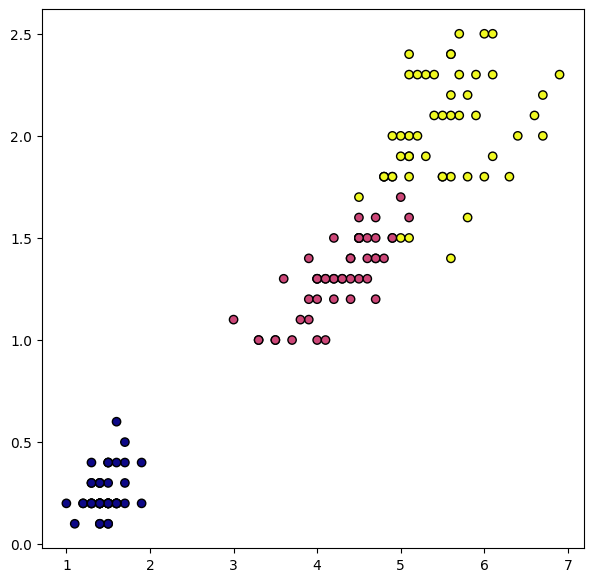

In [3]:
cmap = mpl.colormaps.get("plasma")

plt.figure(figsize=(7,7))
plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, edgecolor="black")
plt.show()

using our custom KNN implementation

In [10]:
model = knn_classifier.KNN_Classifier(k = 3, distance_metric="minkowski")
model.fit(X_train, y_train, k=2)
predictions = model.predict(X_test)

our implementation yields about 

In [12]:
accuracy = jnp.sum(predictions == y_test) / len(y_test)
print(accuracy)

0.96666664


### Trivial Conceptual Example


In [13]:
from prometheus.classical import knn_classifier

In [14]:
model = knn_classifier.KNN_Classifier(k = 3, distance_metric="minkowski")
model.fit(X_train, y_train, k=2)
model.predict(X_test)



Array([0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 0, 2, 2, 1, 0], dtype=int32)

In [15]:
# Mockup Features SHirt sizes: [Height (cms), Weight (kgs)]

X_data_raw = [
    [160, 59], [160, 61], [160, 65],
    [162, 61], [162, 62], [165, 62],
    [165, 63], [162, 66], [165, 66],
    [167, 63], [167, 64], [167, 67],
    [170, 64], [170, 65], [170, 68],
    [172, 64], [172, 66], [172, 69],
    [172, 100], [180, 85], [150, 93],
]

# Labels: Shirt Size
y_data_raw_categorical = [
    'S', 'S', 'S',
    'S', 'S', 'S',
    'S', 'M', 'M',
    'M', 'M', 'M',
    'M', 'M', 'M',
    'M', 'M', 'M',
    'L', 'L', 'L',
]

# temporary solution for now, will build an encoder function

label_map = {'S': 0, 'M': 1, 'L': 2}
inverse_label_map = {v: k for k, v in label_map.items()}
y_data_numerical = [label_map[label] for label in y_data_raw_categorical]



In [16]:
model.fit(X_train=X_data_raw, y_train=y_data_numerical, k=2)

In [ ]:


X_test = [
    [161, 60],  # Expected: S
    [166, 65],  # Expected: M
    [171, 67],   # Expected: M
    [170, 101] # L
]
raw_predictions = model.predict(X_test) 
print(f"raw_predictions: \n{raw_predictions}")
categorical_predictions = [inverse_label_map[pred.item()] for pred in list(raw_predictions)]
for i, test_sample in enumerate(X_test):
    print(f"Sample: {test_sample} => Predicted Shirt Size: {categorical_predictions[i]} (Raw: {raw_predictions[i]})")
